# **Fraudulent transactions Prediction**

---



Dataset: https://drive.google.com/file/d/1Oldrehbn5j_L_5Ver4_an9N2J_w6FN9W/view?usp=sharing

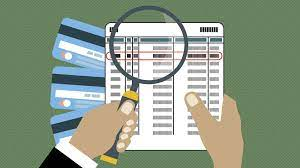

#### **Objective:**

The objective of this notebook is to predict the fraudulent transactions for a financial company.

---



#### **About Dataset:**


Dataset is in CSV format having 6362620 rows and 11 columns.

---



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

**Reading the Data**

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Fraud.csv")

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


**Feature Engineering**

In [6]:
# Remove unwanted columns - nameOrig and nameDest
columns_to_drop = ['nameOrig', 'nameDest']
df = df.drop(columns=columns_to_drop)

# Perform feature engineering
df['balanceChangeOrig'] = df['newbalanceOrig'] - df['oldbalanceOrg']
df['balanceChangeDest'] = df['newbalanceDest'] - df['oldbalanceDest']

df = df.drop(columns=['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'])

df.head()

,step,type,amount,isFraud,isFlaggedFraud,balanceChangeOrig,balanceChangeDest
0,1,PAYMENT,9839.64,0,0,-9839.64,0.0
1,1,PAYMENT,1864.28,0,0,-1864.28,0.0
2,1,TRANSFER,181.00,1,0,-181.00,0.0
3,1,CASH_OUT,181.00,1,0,-181.00,-21182.0
4,1,PAYMENT,11668.14,0,0,-11668.14,0.0


In [7]:
df.shape

(6362620, 7)

There are total 63,62,620 rows and 7 columns in a dataset.

---



In [8]:
df[['isFraud']].value_counts()

isFraud
0          6354407
1             8213
dtype: int64

There are 63,54,407 non-fraud cases and 8213 fraud cases.

---



In [9]:
from sklearn.utils import resample

# Separate the original dataset into fraud and non-fraud cases
fraud_cases = df[df['isFraud'] == 1]
non_fraud_cases = df[df['isFraud'] == 0]

# Determine the minimum number of samples between the two classes
min_samples = min(len(fraud_cases), len(non_fraud_cases))

# Randomly sample from each class to create a balanced dataset
fraud_sampled = resample(fraud_cases, replace=False, n_samples=min_samples, random_state=42)
non_fraud_sampled = resample(non_fraud_cases, replace=False, n_samples=min_samples, random_state=42)

# Combine the sampled datasets to create the final balanced dataset
balanced_data = pd.concat([fraud_sampled, non_fraud_sampled])

# Shuffle the rows to avoid any ordering bias
sampled_df = balanced_data.sample(frac=1, random_state=42)

# Check the class distribution in the balanced dataset
balanced_class_distribution = sampled_df['isFraud'].value_counts(normalize=True)
print("Balanced Class Distribution:")
print(balanced_class_distribution)

Balanced Class Distribution:
0    0.5
1    0.5
Name: isFraud, dtype: float64


In [10]:
sampled_df[['isFraud']].value_counts()

isFraud
0          8213
1          8213
dtype: int64

After sampling the data, we have a balanced dataset with same number of fraud and non-fraud cases.

---



In [11]:
sampled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,16426.0,306.441556,1.933216e+02,1.00,161.0000,283.00,410.0000,743.00
amount,16426.0,824865.516675,1.862573e+06,0.00,38157.9125,175267.61,540436.2150,31479113.67
isFraud,16426.0,0.500000,5.000152e-01,0.00,0.0000,0.50,1.0000,1.00
isFlaggedFraud,16426.0,0.000974,3.119577e-02,0.00,0.0000,0.00,0.0000,1.00
balanceChangeOrig,16426.0,-717050.725552,1.850404e+06,-10000000.00,-437831.3975,-34950.35,0.0000,725058.71
balanceChangeDest,16426.0,429612.193182,1.443078e+06,-961982.07,0.0000,0.00,227207.8975,33946497.64


In [12]:
sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16426 entries, 5682294 to 4777911
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   step               16426 non-null  int64  
 1   type               16426 non-null  object 
 2   amount             16426 non-null  float64
 3   isFraud            16426 non-null  int64  
 4   isFlaggedFraud     16426 non-null  int64  
 5   balanceChangeOrig  16426 non-null  float64
 6   balanceChangeDest  16426 non-null  float64
dtypes: float64(3), int64(3), object(1)
memory usage: 1.0+ MB


In [13]:
df.isna().sum()

step                 0
type                 0
amount               0
isFraud              0
isFlaggedFraud       0
balanceChangeOrig    0
balanceChangeDest    0
dtype: int64

There are no null values.

---



In [14]:
for column in sampled_df.columns:
    unique_values = sampled_df[column].unique()

    # Check if the number of unique values exceeds 5
    if len(unique_values) > 5:
        value_range = f"Range: {min(unique_values)} - {max(unique_values)}"
        print(f"Column '{column}': {value_range}")
        print("==========================================")
    else:
        print(f"Column '{column}': {unique_values}")
        print("==========================================")

Column 'step': Range: 1 - 743
Column 'type': ['CASH_IN' 'PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT']
Column 'amount': Range: 0.0 - 31479113.67
Column 'isFraud': [0 1]
Column 'isFlaggedFraud': [0 1]
Column 'balanceChangeOrig': Range: -10000000.000000004 - 725058.71
Column 'balanceChangeDest': Range: -961982.0700000001 - 33946497.64


In [15]:
# Separate columns by data types
numeric_columns = sampled_df.select_dtypes(include='number').columns.tolist()
categorical_columns = sampled_df.select_dtypes(include='object').columns.tolist()

# Print the list of columns for each data type
print("Numeric Columns:")
print(numeric_columns)

print("\nCategorical Columns:")
print(categorical_columns)

Numeric Columns:
['step', 'amount', 'isFraud', 'isFlaggedFraud', 'balanceChangeOrig', 'balanceChangeDest']

Categorical Columns:
['type']


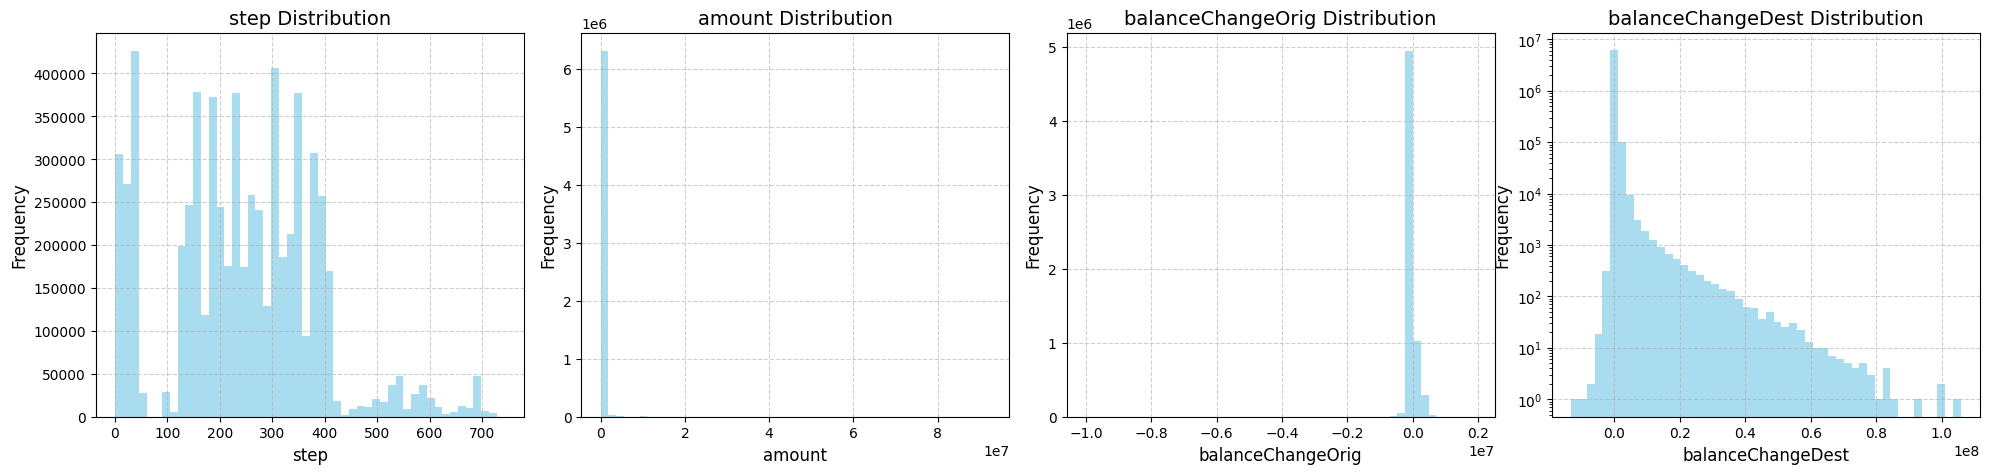

In [16]:
numeric_cols = ['step', 'amount', 'balanceChangeOrig', 'balanceChangeDest']

# Setting up subplots to plot histograms side by side
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

for i, col in enumerate(numeric_cols):
    # Plotting histogram with increased bins and transparency
    axes[i].hist(df[col], bins=50, alpha=0.7, color='skyblue')

    # Adding grid lines to improve readability
    axes[i].grid(True, linestyle='--', alpha=0.6)

    # Setting appropriate titles and labels for each subplot
    axes[i].set_title(f"{col} Distribution", fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)

# Adjusting the layout to avoid overlapping titles and labels
plt.tight_layout()
# Using log scale on the y-axis for better visualization of skewed distributions
plt.yscale('log')

# Display the plot
plt.show()

- Here the histograms provides a visual summary of the data distribution for each of the numeric columns
- A heavily right-skewed distribution in amount is indicating a few large transactions compared to many small ones.

---



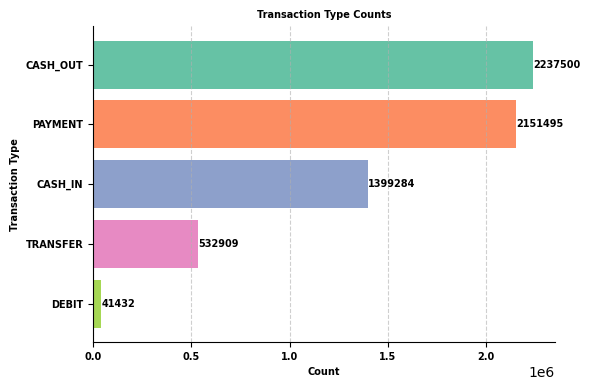

In [17]:
#Transaction Type Analysis
type_counts = df['type'].value_counts()

# Define a custom color palette for the bars
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f']

# Create a horizontal bar plot
plt.figure(figsize=(6,4))
plt.barh(type_counts.index, type_counts.values, color=colors)

# Adding labels and title with custom font styles
plt.xlabel('Count', fontsize=7, fontweight='bold')
plt.ylabel('Transaction Type', fontsize=7, fontweight='bold')
plt.title('Transaction Type Counts', fontsize=7, fontweight='bold')

# Adding data labels on the bars with custom font styles
for index, value in enumerate(type_counts.values):
    plt.text(value, index, str(value), va='center', fontsize=7, fontweight='bold')

# Removing the top and right spines for a cleaner look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adding a grid to the plot for better readability
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Inverting the y-axis to display transaction types in descending order
plt.gca().invert_yaxis()

# Customize the tick labels font size and weight
plt.xticks(fontsize=7, fontweight='bold')
plt.yticks(fontsize=7, fontweight='bold')

# Display the plot
plt.tight_layout()
plt.show()

- The Graph shows the transaction types cash-out, payment, cash-in, transfer and debit along with the corresponding counts for each type.

1. There are 22,37,500 cash-out transactions.
2. There are 21,51,495 payment transactions.
3. There are 13,99,284 cash-in transactions.
4. There are 5,32,909 transfer transactions.
5. There are 41,432 debit transactions.

---





In [18]:
#Fraud Analysis
fraud_counts = df['isFraud'].value_counts()
fraud_percentage = (fraud_counts[1] / df.shape[0]) * 100
print("Fraud Analysis:")
print(fraud_counts)
print(f"Percentage of Fraudulent Transactions: {fraud_percentage:.2f}%")

Fraud Analysis:
0    6354407
1       8213
Name: isFraud, dtype: int64
Percentage of Fraudulent Transactions: 0.13%


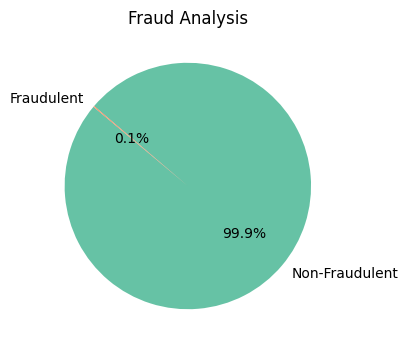

In [19]:
# Create a pie chart
plt.figure(figsize=(4,4))
plt.pie(fraud_counts, labels=['Non-Fraudulent', 'Fraudulent'], colors=['#66c2a5', '#fc8d62'], autopct='%1.1f%%', startangle=140)

# Adding a title
plt.title('Fraud Analysis')

# Display the plot
plt.show()

- Here we can see the proportion of fraudulent transactions is too less as compared to non fraudulent transactions.
- There are 99.9% non fraudulent transactions where the remaining 0.1% are fraudulent transactions

---


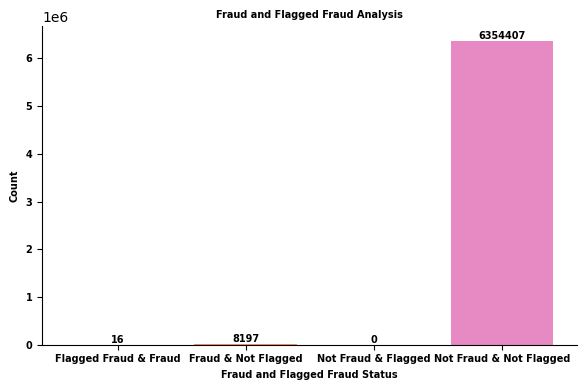

In [20]:
# Assuming you have two boolean columns 'isFraud' and 'isFlaggedFraud' in your DataFrame 'df'
flagged_fraud = df[(df['isFraud'] == True) & (df['isFlaggedFraud'] == True)].shape[0]
fraud_not_flagged = df[(df['isFraud'] == True) & (df['isFlaggedFraud'] == False)].shape[0]
not_fraud_flagged = df[(df['isFraud'] == False) & (df['isFlaggedFraud'] == True)].shape[0]
not_fraud_not_flagged = df[(df['isFraud'] == False) & (df['isFlaggedFraud'] == False)].shape[0]

# Create a stacked bar plot
plt.figure(figsize=(6, 4))
plt.bar(['Flagged Fraud & Fraud', 'Fraud & Not Flagged', 'Not Fraud & Flagged', 'Not Fraud & Not Flagged'],
        [flagged_fraud, fraud_not_flagged, not_fraud_flagged, not_fraud_not_flagged],
        color=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3'])

# Adding labels and title with custom font styles
plt.xlabel('Fraud and Flagged Fraud Status', fontsize=7, fontweight='bold')
plt.ylabel('Count', fontsize=7, fontweight='bold')
plt.title('Fraud and Flagged Fraud Analysis', fontsize=7, fontweight='bold')

# Adding data labels on the bars with custom font styles
for index, value in enumerate([flagged_fraud, fraud_not_flagged, not_fraud_flagged, not_fraud_not_flagged]):
    plt.text(index, value, str(value), va='bottom', ha='center', fontsize=7, fontweight='bold')

# Removing the top and right spines for a cleaner look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Customize the tick labels font size and weight
plt.xticks(fontsize=7, fontweight='bold')
plt.yticks(fontsize=7, fontweight='bold')

# Display the plot
plt.tight_layout()
plt.show()

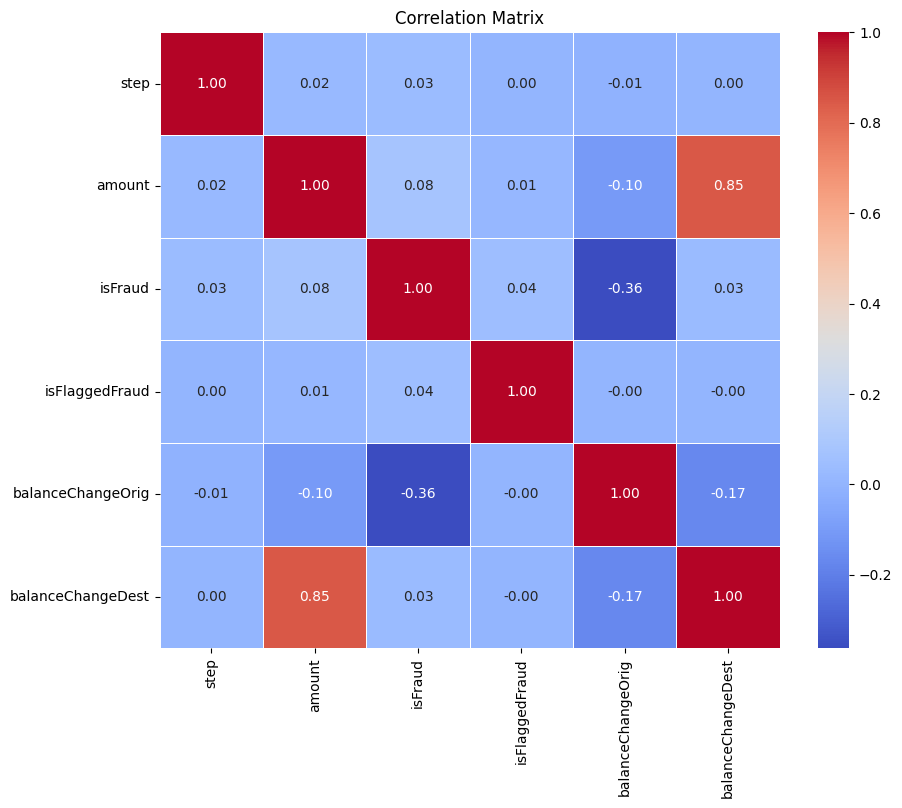

In [21]:
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)

# Adding a title
plt.title('Correlation Matrix')

# Display the plot
plt.show()


- Here we can see there is significant positive correlation between the variable balanceChangeDest and amount, so there is a possibility of multicollinearity.
- But both the variables are important so going forward to see if there is any impact of it or not

---



**Train-Test Split**

In [22]:
from sklearn.model_selection import train_test_split

X = sampled_df[['step', 'amount', 'balanceChangeOrig', 'balanceChangeDest']]
y = sampled_df['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Min-Max scaling**


In [23]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Importing Models**

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

- **Accuracy**: It measures the overall correctness of the model's predictions, representing the ratio of correctly predicted instances to the total number of instances. Higher accuracy indicates more accurate predictions.

- **Precision**: It measures the proportion of true positive predictions among all positive predictions, indicating how many of the predicted positive instances are actually true positives. High precision means fewer false positives.

- **Recall**: Also known as sensitivity or true positive rate, it measures the proportion of true positive predictions among all actual positive instances, indicating how well the model detects positive instances. High recall means fewer false negatives.

- **F1 Score**: It is the harmonic mean of precision and recall, providing a balanced measure of the model's performance on both positive and negative instances. F1 score is suitable when there is an uneven class distribution.

- **ROC AUC Score**: It measures the area under the Receiver Operating Characteristic (ROC) curve, representing the model's ability to distinguish between positive and negative instances. Higher ROC AUC score indicates better discrimination power.

**Logistic Regression**

In [26]:
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred_test = logreg.predict(X_test_scaled)

In [27]:
# Model evaluation
lr_acc_score=accuracy_score(y_test, y_pred_test)
lr_precision = precision_score(y_test, y_pred_test)
lr_recall = recall_score(y_test, y_pred_test)
lr_f1 = f1_score(y_test, y_pred_test)
lr_roc_auc = roc_auc_score(y_test, y_pred_test)

print(f"Accuracy: {lr_acc_score}")
print(f"Precision: {lr_precision}")
print(f"Recall: {lr_recall}")
print(f"F1 Score: {lr_f1}")
print(f"ROC AUC Score: {lr_roc_auc}")
confusion_matrix(y_test, y_pred_test)

Accuracy: 0.8566646378575776
Precision: 0.950188679245283
Recall: 0.7566105769230769
F1 Score: 0.8424222147875543
ROC AUC Score: 0.8579600356871858


array([[1556,   66],
       [ 405, 1259]])

**Naive Bayes**

In [28]:
m2 = 'Naive Bayes'
nb = GaussianNB()
nb.fit(X_train_scaled,y_train)
nbpred = nb.predict(X_test_scaled)

In [29]:
# Model evaluation
nb_acc_score = accuracy_score(y_test, nbpred)
nb_precision = precision_score(y_test, y_pred_test)
nb_recall = recall_score(y_test, y_pred_test)
nb_f1 = f1_score(y_test, y_pred_test)
nb_roc_auc = roc_auc_score(y_test, y_pred_test)

print(f"Accuracy: {nb_acc_score}")
print(f"Precision: {nb_precision}")
print(f"Recall: {nb_recall}")
print(f"F1 Score: {nb_f1}")
print(f"ROC AUC Score: {nb_roc_auc}")
confusion_matrix(y_test, y_pred_test)

Accuracy: 0.7751065124771759
Precision: 0.950188679245283
Recall: 0.7566105769230769
F1 Score: 0.8424222147875543
ROC AUC Score: 0.8579600356871858


array([[1556,   66],
       [ 405, 1259]])

**Random Forest Classfier**

In [30]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train_scaled,y_train)
rf_predicted = rf.predict(X_test_scaled)

In [31]:
# Model evaluation
rf_acc_score = accuracy_score(y_test, rf_predicted)
rf_precision = precision_score(y_test, y_pred_test)
rf_recall = recall_score(y_test, y_pred_test)
rf_f1 = f1_score(y_test, y_pred_test)
rf_roc_auc = roc_auc_score(y_test, y_pred_test)

print(f"Accuracy: {rf_acc_score}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F1 Score: {rf_f1}")
print(f"ROC AUC Score: {rf_roc_auc}")
confusion_matrix(y_test, y_pred_test)

Accuracy: 0.9409616555082166
Precision: 0.950188679245283
Recall: 0.7566105769230769
F1 Score: 0.8424222147875543
ROC AUC Score: 0.8579600356871858


array([[1556,   66],
       [ 405, 1259]])

**K-Neighbors Classifier**

In [32]:
m4= 'K-Neighbors Classifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_scaled, y_train)
knn_predicted = knn.predict(X_test_scaled)

In [33]:
# Model evaluation
knn_acc_score = accuracy_score(y_test, knn_predicted)
knn_precision = precision_score(y_test, y_pred_test)
knn_recall = recall_score(y_test, y_pred_test)
knn_f1 = f1_score(y_test, y_pred_test)
knn_roc_auc = roc_auc_score(y_test, y_pred_test)

print(f"Accuracy: {knn_acc_score}")
print(f"Precision: {knn_precision}")
print(f"Recall: {knn_recall}")
print(f"F1 Score: {knn_f1}")
print(f"ROC AUC Score: {knn_roc_auc}")
confusion_matrix(y_test, y_pred_test)

Accuracy: 0.9427875836883749
Precision: 0.950188679245283
Recall: 0.7566105769230769
F1 Score: 0.8424222147875543
ROC AUC Score: 0.8579600356871858


array([[1556,   66],
       [ 405, 1259]])

**Decision Tree Classifier**

In [34]:
m5 = 'Decision Tree Classifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train_scaled, y_train)
dt_predicted = dt.predict(X_test_scaled)

In [35]:
# Model evaluation
dt_acc_score = accuracy_score(y_test, dt_predicted)
dt_precision = precision_score(y_test, y_pred_test)
dt_recall = recall_score(y_test, y_pred_test)
dt_f1 = f1_score(y_test, y_pred_test)
dt_roc_auc = roc_auc_score(y_test, y_pred_test)

print(f"Accuracy: {dt_acc_score}")
print(f"Precision: {dt_precision}")
print(f"Recall: {dt_recall}")
print(f"F1 Score: {dt_f1}")
print(f"ROC AUC Score: {dt_roc_auc}")
confusion_matrix(y_test, y_pred_test)

Accuracy: 0.9297017650639074
Precision: 0.950188679245283
Recall: 0.7566105769230769
F1 Score: 0.8424222147875543
ROC AUC Score: 0.8579600356871858


array([[1556,   66],
       [ 405, 1259]])

In [36]:
model_ev = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Random Forest', 'K-Nearest Neighbour', 'Decision Tree'],
    'Accuracy': [lr_acc_score * 100, nb_acc_score * 100, rf_acc_score * 100, knn_acc_score * 100, dt_acc_score * 100],
    'Precision': [lr_precision, nb_precision, rf_precision, knn_precision, dt_precision],
    'Recall': [lr_recall, nb_recall, rf_recall, knn_recall, dt_recall],
    'F1 Score': [lr_f1, nb_f1, rf_f1, knn_f1, dt_f1],
    'ROC AUC Score': [lr_roc_auc, nb_roc_auc, rf_roc_auc, knn_roc_auc, dt_roc_auc]
})


print(model_ev)

                 Model   Accuracy  Precision    Recall  F1 Score  \
0  Logistic Regression  85.666464   0.950189  0.756611  0.842422   
1          Naive Bayes  77.510651   0.950189  0.756611  0.842422   
2        Random Forest  94.096166   0.950189  0.756611  0.842422   
3  K-Nearest Neighbour  94.278758   0.950189  0.756611  0.842422   
4        Decision Tree  92.970177   0.950189  0.756611  0.842422   

   ROC AUC Score  
0        0.85796  
1        0.85796  
2        0.85796  
3        0.85796  
4        0.85796  


Over all the Machine Learning Algorithms, KNN(94.28 %) and Random Forest(94.096 %) Algorithm gives us the best Accuracy.

---



**ROC Curve**

In [37]:
from sklearn.metrics import roc_curve

In [38]:
tpr, fpr, thresholds = roc_curve(y_test, y_pred_test)

In [39]:
roc_auc = roc_auc_score(y_test, y_pred_test)

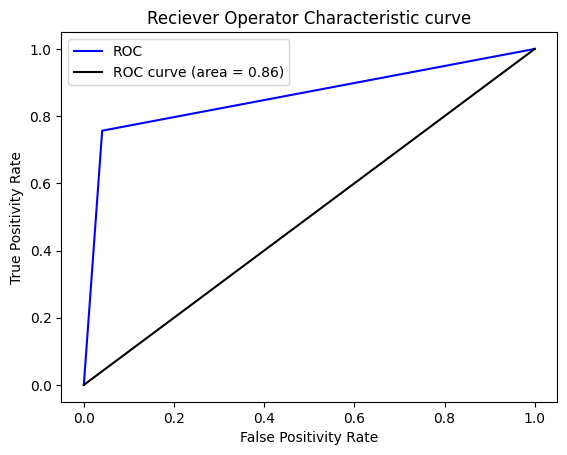

In [40]:
plt.plot(tpr, fpr, color = 'blue', label = 'ROC')
plt.plot([0,1],[0,1],color = 'black', label = 'ROC curve (area = %0.2f)'% roc_auc)
plt.xlabel("False Positivity Rate")
plt.ylabel("True Positivity Rate")
plt.title("Reciever Operator Characteristic curve")
plt.legend()
plt.show()

AUC : 0.86 - It suggests that the model has a good ability to distinguish between positive and negative cases. It indicates that the model is performing significantly better than a random classifier(0.5)

---

